# Imports

In [1]:
library(car)
library(reshape2)
library(ggplot2)

In [2]:
#change size of graphs
options(repr.plot.width=4, repr.plot.height=4)

In [3]:
crime_df = read.csv('crime_v2.csv')

# Quick Data Check

In [61]:
?summary()

In [4]:
str(crime_df)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

In [5]:
#see if there are rows where west and central is set to 1
crime_df[crime_df$west+crime_df$central > 1,]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
33,71,87,0.0544061,0.243119,0.229589999,0.379175,11.29,0.00207028,4.834734,31.53658,...,595.3719,240.3673,348.0254,295.2301,358.95,509.43,359.11,339.58,0.1018608,0.07939028
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [178]:
head(crime_df)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,...,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,...,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,...,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,...,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,...,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [6]:
tail(crime_df)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


**Findings:**
* County numbers are odds.
* there is one row where the county is both central and west.
* There are 5 blank rows at the tail.
* prbconv is reading as a factor/string, needs to be cleaned up.

# Data Clean Up

In [7]:
#removing the last 5 rows that are blank
crime_df = head(crime_df, -6)

In [8]:
#change prbconv into doubles instead of string/factors
crime_df$prbconv = as.double(as.character(crime_df$prbconv))

In [9]:
summary(crime_df)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
    prbconv           prbpris           avgsen           polpc          
 Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.0007459  
 1st Qu.:0.34541   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.0012308  
 Median :0.45283   Median :0.4234   Median : 9.100   Median :0.0014853  
 Mean   :0.55128   Mean   :0.4108   Mean   : 9.647   Mean   :0.0017022  
 3rd Qu.:0.58886   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.0018768  
 Max.   :2.12121   Max.   :0.6000   Max.   :20.700   Max.   :0.0090543  
    density         

# Exploratory Data Analysis

**Question 1:** What do you want to measure? Make sure you identify variables that will be relevant to the concerns of the political campaign.

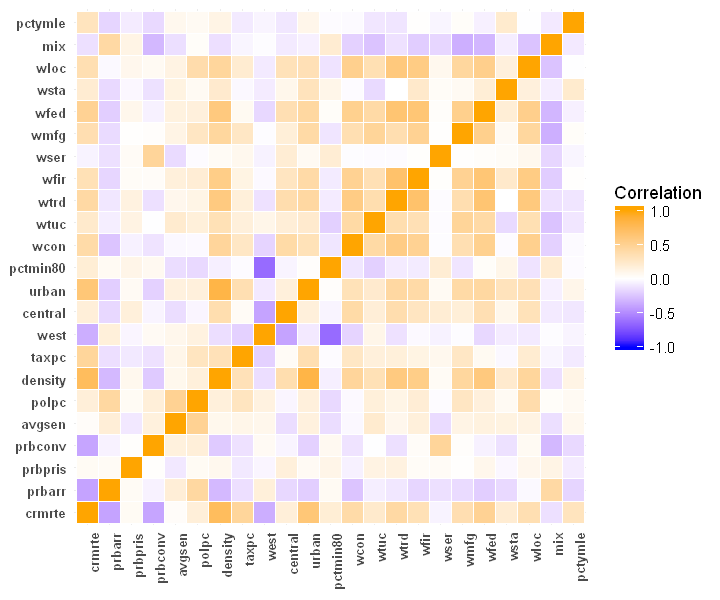

In [10]:
options(repr.plot.width=6, repr.plot.height=5)
#correlation matrix for top 4 correlation and bottom 4 correlation
cor_dr = cor(crime_df[c('prbarr',
                        'prbpris',
                        'prbconv',
                        'avgsen',
                        'polpc',
                        'density',
                        'taxpc',
                        'west',
                        'central',
                        'urban',
                        'pctmin80',
                        'wcon',
                        'wtuc',
                        'wtrd',
                        'wfir',
                        'wser',
                        'wmfg',
                        'wfed',
                        'wsta',
                        'wloc',
                        'mix',
                        'pctymle')],
              use = "complete.obs")

# Heatmap
ggplot(data = melt(cor_dr, na.rm = TRUE),
       aes(Var2, Var1, fill = value))+
theme_minimal()+ 
geom_tile(color = 'white')+
scale_fill_gradient2(low = 'blue',
                     high = "orange",
                     mid = 'white', 
                     midpoint = 0,
                     limit = c(-1,1),
                     name= 'Correlation')+
theme(axis.text.x = element_text(face='bold',
                                 angle=90,
                                 vjust = 1,
                                 size =8,
                                 hjust = 1),
     axis.text.y = element_text(face='bold',
                                size=8),
     axis.title.x=element_blank(),
     axis.title.y=element_blank())

**Findings:**
* Crime rate (crmrte) seems to have the strongest correlation with density(+), prbarr(-), prbconv (-), taxpc(+), wages(+) - all wages except wser.
* Density seems to be correlated with wages (+): wcon, wtuc, wtrd, wfir ,wser, wmfg, wfed, wloc. This just implies that there are higher wages in the more dense counties.
* Probability of Arrest (prbarr) is correlated with polpc(+), mix, density.
* Probability of Conviction (prbconv) is correlated with wser (+), mix(-).
* Tax Revenue Per Capita is correlated to density (+).
* crmrate is most likely the dependent variable that is of most interest as it for the political campaing. 

**Misc/Interesting Notes:**
* Minorities seems to be the lowest in the west.

**Potential Omitted Variables:**
* Cost of living in the county - higher wages may be associated with higher cost of living.
* Unemployment Rate.

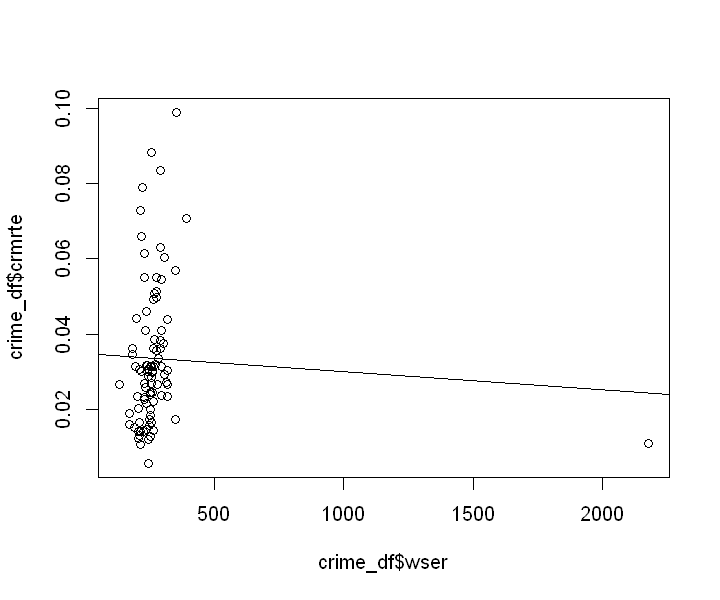

In [25]:
plot(crime_df$wser, crime_df$crmrte)
model1 = lm(crmrte ~ wser, data = crime_df)
abline(model1)

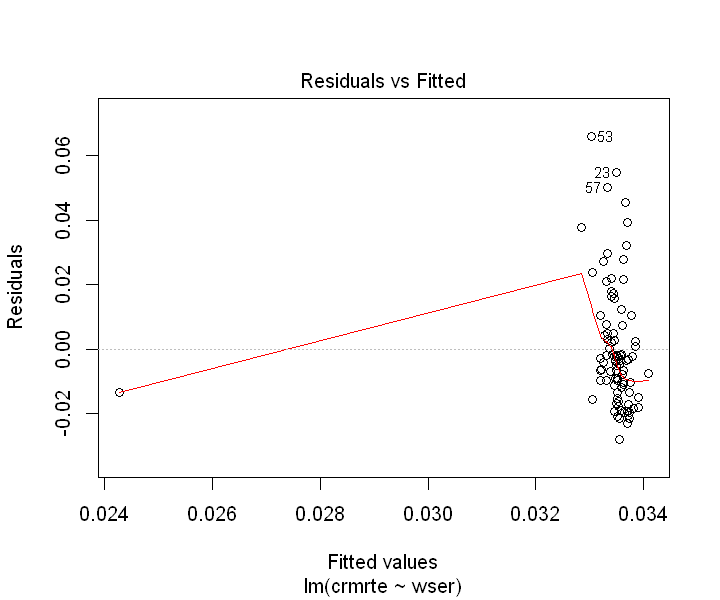

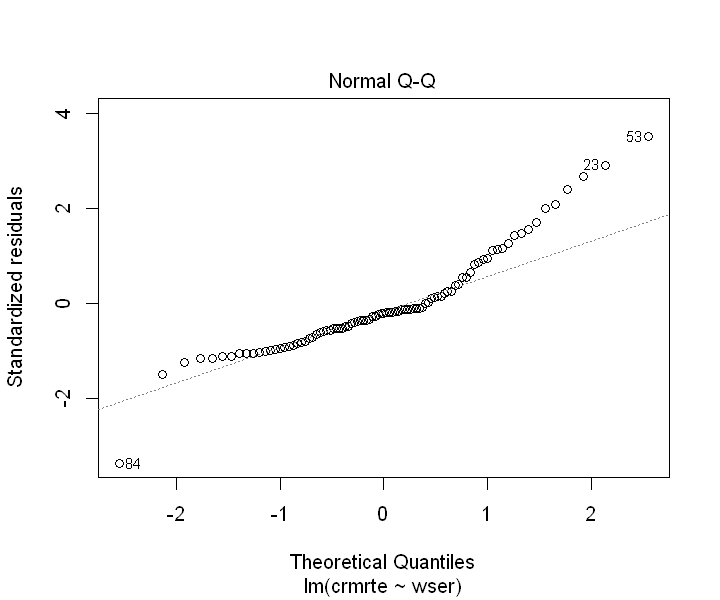

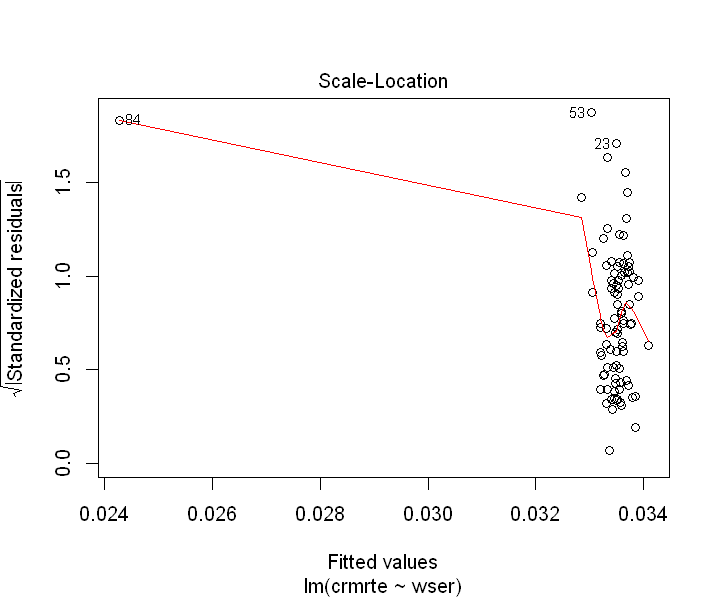

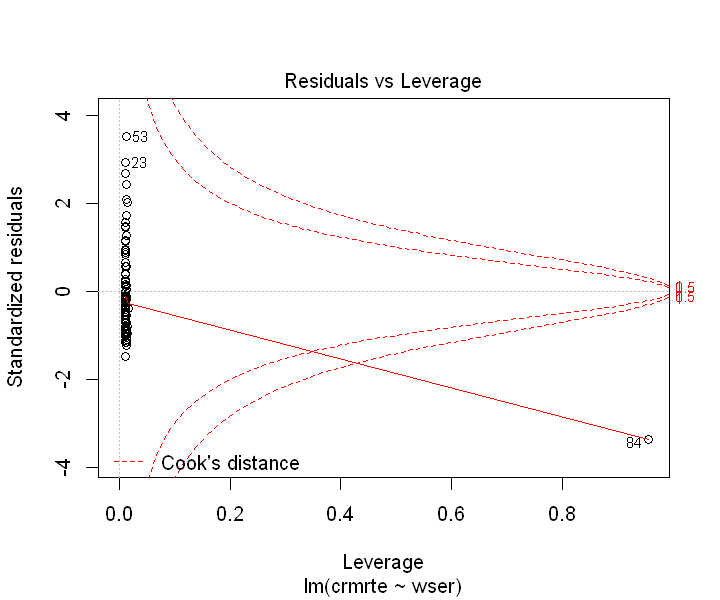

In [28]:
plot(model1)

In [ ]:
plot(crime_df$prbarr, crime_df$polpc)
cor(crime_df$prbarr, crime_df$polpc)

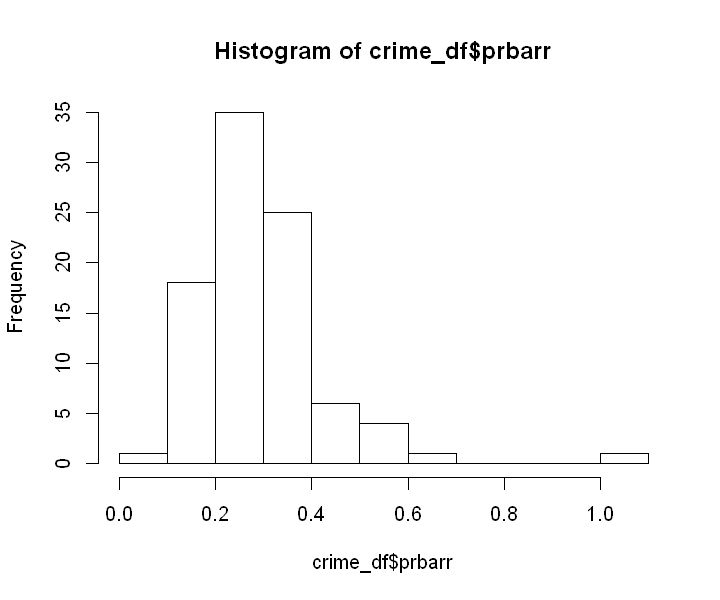

In [12]:
hist(crime_df$prbarr)

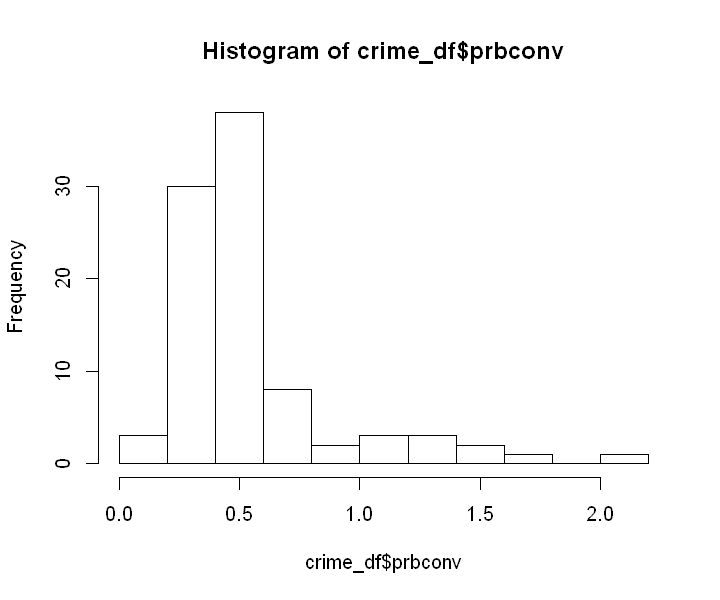

In [13]:
hist(crime_df$prbconv)

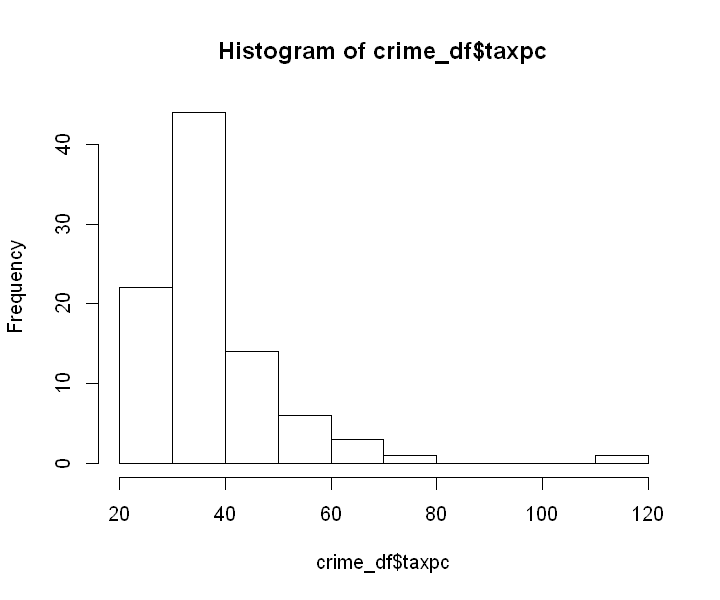

In [14]:
hist(crime_df$taxpc)

**Question 2:** What do you want to measure? Make sure you identify variables that will be relevant to the concerns of the political campaign.

# Regression

In [15]:
model1 = lm(crmrte~density+prbarr+prbpris+prbconv+taxpc+wcon+wtuc+wtrd+wfir+wmfg+wfed+wsta+wloc, data=crime_df)
model1

summary(model1)$r.squared


Call:
lm(formula = crmrte ~ density + prbarr + prbpris + prbconv + 
    taxpc + wcon + wtuc + wtrd + wfir + wmfg + wfed + wsta + 
    wloc, data = crime_df)

Coefficients:
(Intercept)      density       prbarr      prbpris      prbconv        taxpc  
 -4.170e-04    5.799e-03   -3.069e-02    8.151e-03   -1.394e-02    3.485e-04  
       wcon         wtuc         wtrd         wfir         wmfg         wfed  
 -1.107e-05   -9.403e-06   -2.947e-05   -3.989e-05    6.696e-07    6.692e-05  
       wsta         wloc  
  6.552e-07    6.932e-05  


[1] 0.7013116

In [16]:
std_crime_df = cbind(crime_df)

In [187]:
range01 <- function(x){(x-min(x))/(max(x)-min(x))}

In [188]:
for (col in 3:ncol(std_crime_df)) {
    std_crime_df[,col] = range01(std_crime_df[,col])
}

In [196]:
lm(crmrte~.-county-year-crmrte, data=crime_df)


Call:
lm(formula = crmrte ~ . - county - year - crmrte, data = crime_df)

Coefficients:
(Intercept)       prbarr      prbconv      prbpris       avgsen        polpc  
  1.369e-02   -5.150e-02   -1.863e-02    3.127e-03   -4.045e-04    6.966e+00  
    density        taxpc         west      central        urban     pctmin80  
  5.317e-03    1.624e-04   -2.550e-03   -4.257e-03   -6.068e-05    3.251e-04  
       wcon         wtuc         wtrd         wfir         wser         wmfg  
  2.274e-05    6.350e-06    2.938e-05   -3.543e-05   -1.718e-06   -9.109e-06  
       wfed         wsta         wloc          mix      pctymle  
  2.916e-05   -2.229e-05    1.492e-05   -1.867e-02    1.014e-01  


In [200]:
model2 <- lm(crmrte~.-county-year-crmrte, data=std_crime_df)

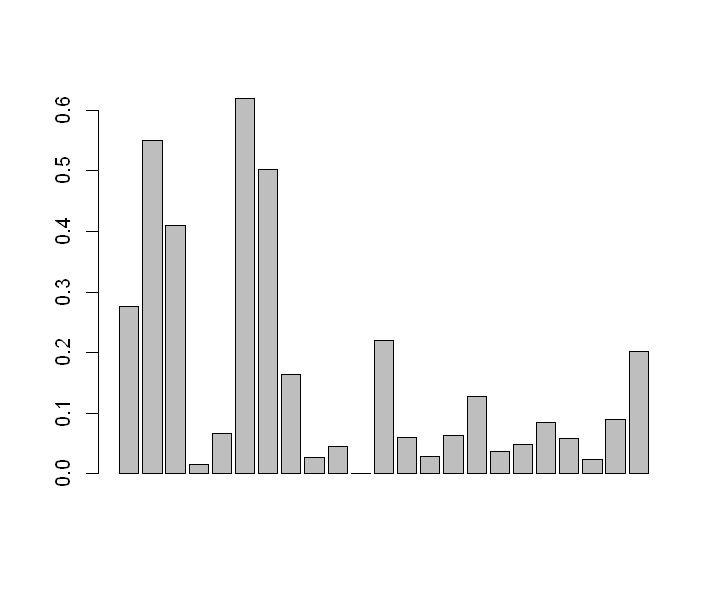

In [207]:
barplot(abs(model2$coefficients), xaxt="n")

In [ ]:
x <- barplot(table(mtcars$cyl), xaxt="n")
labs <- paste(names(table(mtcars$cyl)), "cylinders")
text(cex=1, x=x-.25, y=-1.25, labs, xpd=TRUE, srt=45)

In [ ]:
for (col in 3:ncol(std_crime_df)) {
    std_crime_df[,col] = range01(std_crime_df[,col])
}

In [221]:
test

[1] "county"   "year"     "crmrte"   "prbarr"   "prbconv"  "prbpris" 
 [7] "avgsen"   "polpc"    "density"  "taxpc"    "west"     "central" 
[13] "urban"    "pctmin80" "wcon"     "wtuc"     "wtrd"     "wfir"    
[19] "wser"     "wmfg"     "wfed"     "wsta"     "wloc"     "mix"     
[25] "pctymle"

In [58]:
#base R-Squared
base_model <- lm(crmrte~.-county-year-crmrte, data=std_crime_df)
base_r2 <- summary(base_model)$r.squared

#create list of variables for the for-loop
var_names <- colnames(std_crime_df)
remove <- c('county', 'year','crmrte')
var_names <- var_names[! var_names %in% remove]

#initiate an empty vector to store the marginal R-Squared
var_r2_delta = c()

#loop through the variable names and store the marginal R-Squared
for (i in var_names) {
    fmla <- as.formula(paste("crmrte ~ - crmrte +", paste(var_names[! var_names %in% i], collapse= "+")))
    delta_model <- lm(fmla, data=crime_df)
    r2_delta <- base_r2-summary(delta_model)$r.squared
    var_r2_delta <- c(var_r2_delta, r2_delta)
}

#put the variable and marginal R-squared in a dataframe
mar_r2_df <- data.frame(v1=var_names, v2=var_r2_delta)
colnames(mar_r2_df) <- c('variable', 'marginalr2')

#sort dataframe by marginal R-squared in a descending order
mar_r2_df <- mar_r2_df[rev(order(mar_r2_df$marginalr2)),]

In [59]:
mar_r2_df

,variable,marginalr2
1,prbarr,5.914240e-02
2,prbconv,5.288978e-02
5,polpc,4.424981e-02
6,density,3.365748e-02
11,pctmin80,2.669269e-02
22,pctymle,1.084116e-02
7,taxpc,6.213394e-03
9,central,5.115898e-03
15,wfir,3.686964e-03
21,mix,3.499656e-03


Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

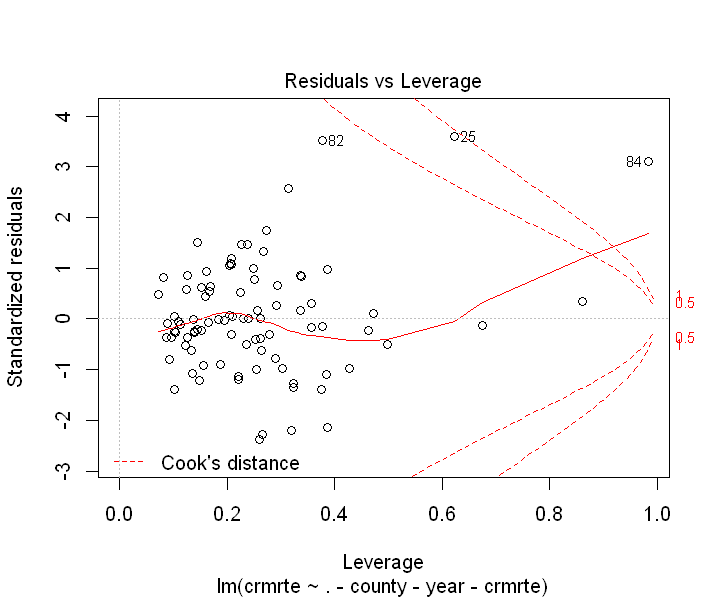

In [55]:
base_model <- lm(crmrte~.-county-year-crmrte, data=std_crime_df)
plot(base_model, which=5)

In [56]:
str(subset(crime_df, crime_df$wser>2000))

'data.frame':	1 obs. of  25 variables:
 $ county  : int 185
 $ year    : int 87
 $ crmrte  : num 0.0109
 $ prbarr  : num 0.195
 $ prbconv : num 2.12
 $ prbpris : num 0.443
 $ avgsen  : num 5.38
 $ polpc   : num 0.00122
 $ density : num 0.389
 $ taxpc   : num 40.8
 $ west    : int 0
 $ central : int 1
 $ urban   : int 0
 $ pctmin80: num 64.3
 $ wcon    : num 227
 $ wtuc    : num 332
 $ wtrd    : num 167
 $ wfir    : num 264
 $ wser    : num 2177
 $ wmfg    : num 248
 $ wfed    : num 381
 $ wsta    : num 367
 $ wloc    : num 300
 $ mix     : num 0.0497
 $ pctymle : num 0.0701


In [57]:
summary(crime_df)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
    prbconv           prbpris           avgsen           polpc          
 Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.0007459  
 1st Qu.:0.34541   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.0012308  
 Median :0.45283   Median :0.4234   Median : 9.100   Median :0.0014853  
 Mean   :0.55128   Mean   :0.4108   Mean   : 9.647   Mean   :0.0017022  
 3rd Qu.:0.58886   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.0018768  
 Max.   :2.12121   Max.   :0.6000   Max.   :20.700   Max.   :0.0090543  
    density         

* max pctmin80
* max wser
* 

In [33]:
#base R-Squared
base_model <- lm(crmrte~.-county-year-crmrte, data=std_crime_df)
base_r2 <- summary(base_model)$r.squared

#create list of variables for the for-loop
var_names <- colnames(std_crime_df)
remove <- c('county', 'year','crmrte')
var_names <- var_names[! var_names %in% remove]

#initiate an empty vector to store the marginal R-Squared
aic_list = c()

#loop through the variable names and store the marginal R-Squared
for (i in var_names) {
    fmla <- as.formula(paste("crmrte ~ - crmrte +", paste(var_names[! var_names %in% i], collapse= "+")))
    delta_model <- lm(fmla, data=crime_df)
    aic_delta <- AIC(delta_model)
    aic_list <- c(aic_list, aic_delta )
}

#put the variable and marginal R-squared in a dataframe
aic_df <- data.frame(v1=var_names, v2=aic_list)
colnames(aic_df) <- c('variable', 'aic')

#sort dataframe by marginal R-squared in a descending order
aic_df <- aic_df[order(aic_df$aic),]

In [34]:
aic_df

,variable,aic
10,urban,-595.6247
3,prbpris,-595.5320
16,wser,-595.5006
20,wloc,-595.4947
13,wtuc,-595.3835
17,wmfg,-595.0646
14,wtrd,-595.0587
8,west,-595.0229
12,wcon,-594.7058
19,wsta,-594.6287


In [60]:
mar_r2_df

,variable,marginalr2
1,prbarr,5.914240e-02
2,prbconv,5.288978e-02
5,polpc,4.424981e-02
6,density,3.365748e-02
11,pctmin80,2.669269e-02
22,pctymle,1.084116e-02
7,taxpc,6.213394e-03
9,central,5.115898e-03
15,wfir,3.686964e-03
21,mix,3.499656e-03


In [41]:
model1 = lm(crmrte~prbarr, data=crime_df)
model1


summary(model1)$r.squared
AIC(model1)


Call:
lm(formula = crmrte ~ prbarr, data = crime_df)

Coefficients:
(Intercept)       prbarr  
    0.04933     -0.05403  


[1] 0.1547083

[1] -475.1975

,variable,marginalr2
1,prbarr,5.914240e-02
2,prbconv,5.288978e-02
5,polpc,4.424981e-02
6,density,3.365748e-02
11,pctmin80,2.669269e-02
22,pctymle,1.084116e-02
7,taxpc,6.213394e-03
9,central,5.115898e-03
15,wfir,3.686964e-03
21,mix,3.499656e-03


In [339]:
mar_r2_df

variable,marginalr2
prbarr,5.914240e-02
prbconv,5.288978e-02
prbpris,1.479749e-04
avgsen,2.103100e-03
polpc,4.424981e-02
density,3.365748e-02
taxpc,6.213394e-03
west,9.623122e-04
central,5.115898e-03
urban,2.117068e-07
